## Use Flaml to solve [Titanic Kaggle Competition](https://www.kaggle.com/c/titanic/overview)

In [ ]:
!pip3 install flaml

     |████████████████████████████████| 142 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 44.0 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


### Load datasets

I use the [Titanic extended dataset](https://www.kaggle.com/pavlofesenko/titanic-extended), which has more complete and updated age/class data, no need for extra feature engineering. Nothing else is used.

In [ ]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

### Simple preprocessing

Combine family numbers, categorical encoding, and drop N/A data.

In [ ]:
train['Family'] = train.SibSp + train.Parch
test['Family'] = test.SibSp + test.Parch

In [ ]:
train.Cabin = train.Cabin.str[0]
test.Cabin = test.Cabin.str[0]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col_to_be_encoded = ['Sex', 'Cabin', 'Boarded']

for col in col_to_be_encoded:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [ ]:
selected_cols = ['Sex', 'Age_wiki', 'Family', 'Class', 'Cabin', 'Fare', 'Boarded']

train = train[selected_cols + ['Survived']]
test = test[selected_cols + ['PassengerId']]

In [ ]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       887 non-null    int64  
 1   Age_wiki  887 non-null    float64
 2   Family    887 non-null    int64  
 3   Class     887 non-null    float64
 4   Cabin     887 non-null    int64  
 5   Fare      887 non-null    float64
 6   Boarded   887 non-null    int64  
 7   Survived  887 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 62.4 KB


In [ ]:
train

,Sex,Age_wiki,Family,Class,Cabin,Fare,Boarded,Survived
0,1,22.0,1,3.0,8,7.2500,3,0.0
1,0,35.0,1,1.0,2,71.2833,1,1.0
2,0,26.0,0,3.0,8,7.9250,3,1.0
3,0,35.0,1,1.0,2,53.1000,3,1.0
4,1,35.0,0,3.0,8,8.0500,3,0.0
...,...,...,...,...,...,...,...,...
886,1,27.0,0,2.0,8,13.0000,3,0.0
887,0,19.0,0,1.0,1,30.0000,3,1.0
888,0,7.0,3,3.0,8,23.4500,3,0.0
889,1,26.0,0,1.0,2,30.0000,1,1.0


### Train model

Use Flaml's stacking ensemble method and train for an hour in Colab:

In [ ]:
from flaml import AutoML

clf = AutoML()
clf.fit(dataframe=train, label='Survived', 
        estimator_list=['lgbm', 'xgboost', 'rf', 'extra_tree', 'lrl2'],
        task='classification', ensemble=True, time_budget=3600)

串流輸出內容已截斷至最後 5000 行。
[flaml.automl: 01-18 09:49:29] {2437} INFO - iteration 6775, current learner lgbm
[flaml.automl: 01-18 09:49:29] {2603} INFO -  at 2660.9s,	estimator lgbm's best error=0.1052,	best estimator lgbm's best error=0.1052
[flaml.automl: 01-18 09:49:29] {2437} INFO - iteration 6776, current learner lrl2
[flaml.automl: 01-18 09:49:29] {2603} INFO -  at 2661.1s,	estimator lrl2's best error=0.1456,	best estimator lgbm's best error=0.1052
[flaml.automl: 01-18 09:49:29] {2437} INFO - iteration 6777, current learner lgbm
[flaml.automl: 01-18 09:49:29] {2603} INFO -  at 2661.2s,	estimator lgbm's best error=0.1052,	best estimator lgbm's best error=0.1052
[flaml.automl: 01-18 09:49:29] {2437} INFO - iteration 6778, current learner rf
[flaml.automl: 01-18 09:49:31] {2603} INFO -  at 2662.5s,	estimator rf's best error=0.1121,	best estimator lgbm's best error=0.1052
[flaml.automl: 01-18 09:49:31] {2437} INFO - iteration 6779, current learner extra_tree
[flaml.automl: 01-18 09:49:34] 

### Predict test labels and generate submission

In [ ]:
predicted = clf.predict(test.drop(['PassengerId'], axis=1)).flatten().astype('uint8')

In [ ]:
test['Survived'] = pd.Series(predicted)
submission = test[['PassengerId', 'Survived']]
submission.to_csv('./submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


* Kaggle score (categorical accuracy): 0.78947

## How good is the score?

Many solutions on Kaggle involve extensive feature enginnering that use information from the test dataset, thus introduce data leaks. The training and test sets are actually statistically different. Without data leaks 0.78 is in fact a pretty good score.

From the histogram of the leaderboard you can see this is true. (the 1.0 or 100% group are clearly cheaters. The 0% group are probably from submitting float labels.)

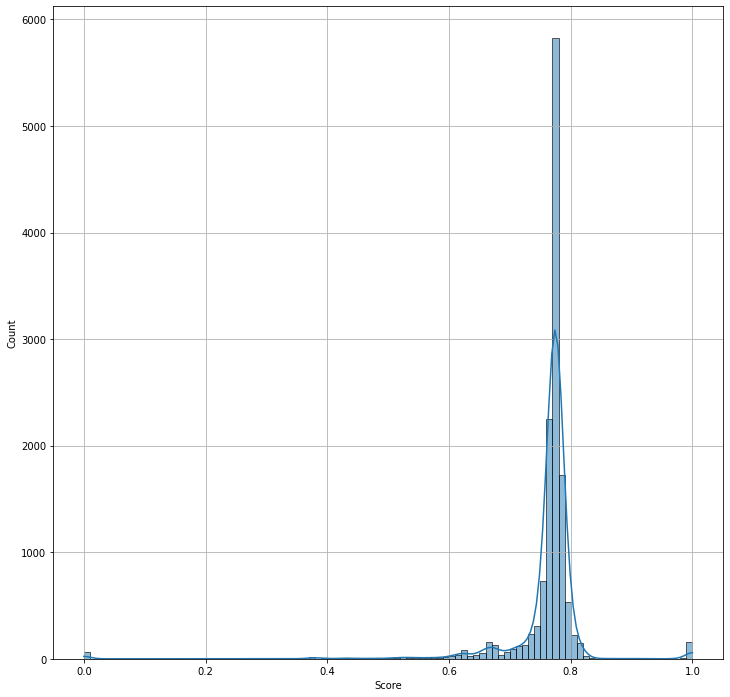

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

score_df = pd.read_csv('./titanic-publicleaderboard.csv')

plt.figure(figsize=(12, 12))
sns.histplot(data=score_df, x='Score', bins=100, kde=True)
plt.grid(True)
plt.show()